# TMA4320 Introduksjon til vitenskapelige beregninger - P-04

### Beregning av inversfunksjon med Newtons metode

**Innledning.** I denne oppgaven skal du lage en funksjon i Python som beregner den inverse av en oppgitt funksjon til høy nøyaktighet. Du vil få mange hint og instruksjoner underveis som du kan følge. Noen utledninger trenger du også å gjøre på veien. Du kan svare ved å redigere på dette dokumentet, for det meste skal du fylle inn i kodeceller, men du skal også skrive noen svar i Markdown-celler som angitt under oppgavebeskrivelsen nedenfor.

Du skal **selv** implementere de to funksjonene beskrevet nedenfor, det gis ikke kreditt for å bruke ferdige funksjoner for algoritmene som man eventuelt måtte finne i et bibliotek. Når det er sagt kan man selvsagt bruke standard numpy-funksjoner av typen *linspace*, *array*, *zeros*, *sin*, *cos*, *abs*, *finfo*, *pi* etc uten reservasjoner. Alle funksjoner fra *matplotlib* står det deg også fritt å benytte.


**Problemet.** Vi skal invertere funksjonen $z=f(w)=w\sin w$ på det åpne intervallet $w\in(0,\frac{\pi}{2})$ der denne funksjonen er monotont voksende. Vi søker med andre ord en funksjon $w=g(z)$ som oppfyller ligningen 
$z=g(z)\sin[g(z)]$. Merk at $g(z)$ i utgangspunktet er en flervaluert funksjon, dvs for hver $z$ fins det mange 
verdier $w=g(z)$ som oppfyller ligningen. For eksempel, for $z=0$ vil $g(0)=k\pi$ oppfylle ligningen for alle heltallige $k$. For å få en virkelig funksjon (med kun én verdi for hver $z$) så begrenser vi verdiområdet til $g(z)\in (0,\frac{\pi}{2})$.

For å lage en numerisk metode som beregner $g(z),\ z\in(0,\frac{\pi}{2})$ bruker vi to elementer som du har lært i kurset
1. Interpolasjon for å finne startverdi til Newtons metode
2. Newtons metode som for en gitt $z$ beregner $w$ slik at $z-f(w)=0$, løses så nøyaktig som mulig (ned til begrensinger i antall siffer datamaskinen regner med).

**Interpolasjon.** Funksjonen $z=f(w)=w\sin w$ er slik at $f(0)=f'(0)=0$, dette vil si at invers funksjon $g(z)$ har uendelig stigningstall i $z=0$ og dette er uheldig ved vanlig polynominterpolasjon av $g(z)$. Derfor skal vi gjøre interpolasjon med en litt annen type funksjoner, nemlig funksjoner av formen

$$
Q(z) = \sqrt{z} (az + b)
$$

Vi bruker interpolasjonsdata $(z_0, g_0)$, $(z_1,g_1)$ der både $z_i$ og $g_i$ ligger i $(0,\frac{\pi}{2}]$. Siden vi ikke kjenner funksjonen $g(z)$ så lar det seg ikke gjøre uten videre å velge $z_0$ og $z_1$ fritt. Men vi kan i stedet velge $g_0$ og $g_1$ og deretter sette $z_0=f(g_0)$ og $z_1=f(g_1)$. For å interpolere kan det være nyttig å observere at vi for dette tilfellet har spesielle Lagrange kardinalfunksjoner som danner basis for interpolasjonsfunksjonene, nemlig

$$
\Lambda_0(z) = \sqrt{\frac{z}{z_0}}\cdot\frac{z-z_1}{z_0-z_1}\quad\text{og}\quad
\Lambda_1(z) = \sqrt{\frac{z}{z_1}} \cdot \frac{z-z_0}{z_1-z_0}
$$

Nedenfor spesifiseres en oppgave du skal gjøre med å implementere en funksjon som beregner $Q(z)$ slik at $Q(z_0)=g_0$ og $Q(z_1)=g_1$.

**Newtoniterasjon.** For å finne $g(z)$ for en gitt $z$, må vi løse ligningen $F_z(w)=z-f(w)=0$. Vi kan tenke på $z$ som en parameter hvis verdi spesifiseres før ligningen løses med hensyn på $w$. Du må selv lage selve iterasjonsformelen i henhold til oppgavebeskrivelsene nedenfor. 
Newtoniterasjonen trenger en startverdi $w_0$ som input, denne finner du som $w_0=Q(z)$.
Newtoniterasjonen genererer approksimasjoner $w_1, w_2,\ldots$. Du skal benytte et stoppkriterium som er relatert til det antall siffer maskinen regner med. Til å hjelpe deg med dette kan du bruke numpy-funksjonen *numpy.finfo*. Denne gir deg et tall som kalles avrundingsenheten via kallet *tol=numpy.finfo(float).eps* (se også kodecelle nederst). Stoppkriteriet du bruker er

$$
     \frac{|w_k-w_{k-1}|}{|w_k|} \leq 2\cdot\text{tol}
$$

**Oppgave 1.** Interpolasjon av den inverse funksjonen $g(z)$.

**(a)** Lag et uttrykk for interpolasjonsfunksjonen $Q(z)$ uttrykt ved $z, z_0, z_1, g(z_0), g(z_1)$ som du gjengir i denne cella. Implementer python-funksjonen *invinterp* som beskrevet i følgende kodecelle, fyll inn din kode i cellen. Som en kontroll på at koden din virker oppgis at med $z=1$, $g_0=\frac{\pi}{3}$, $g_1=\frac{\pi}{2}$ skal man få returnert verdien $1.12118\ldots$.

**Ditt svar:** Uttrykket for interpolasjonsfunksjonen jeg fant

$$
Q(z) = g(z_0) \sqrt{\frac{z}{z_0}} \frac{z-z_1}{z_0-z_1} + g(z_1) \sqrt{\frac{z}{z_1}} \frac{z-z_0}{z_1-z_0}.
$$

**(b)** Lag et plott som viser, for $g_0=\frac{\pi}{3}$, $g_1=\frac{\pi}{2}$, grafen til interpolasjonsfunksjonen $Q(z)$ for $z\in[0,\frac{\pi}{2}]$. Det kan også inkluderes i samme kodecelle nedenfor.

**Ditt svar:** Koden og plottet kodecella

Tester med oppgitte verdier; 1.12119


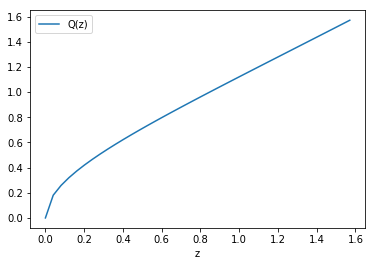

In [38]:
import numpy as np
import matplotlib.pyplot as plt

#a)
def invinterp(z,g0,g1):
    ''' Denne python-funksjonen interpolerer g(z) som beskrevet ovenfor med hensyn på datapunktene
         (z0,g0) og (z1,g1) der 0 < g0 < g1 <= pi/2, z0=f(g0), z1=f(g1), og den returnerer 
         interpolasjonsfunksjonens verdi i z'''
    z0 = g0*np.sin(g0)
    z1 = g1*np.sin(g1)
    A0 = np.sqrt(z/z0)*((z-z1)/(z0-z1))
    A1 = np.sqrt(z/z1)*((z-z0)/(z1-z0))
    return g0*A0 + g1*A1

g0 = np.pi/3
g1 = np.pi/2
z = 1
print("Tester med oppgitte verdier;", round(invinterp(z, g0, g1),5))


#b)
z_axis = np.linspace(0,np.pi/2,40)
Q = invinterp(z_axis, g0, g1)
plt.plot(z_axis, Q, label='Q(z)')
plt.xlabel('z')
plt.legend()
plt.show()

**Oppgave 2.** Beregning av funksjonen g(z) til maskin-nøyaktighet med Newtons metode. Den generelle idéen er at du henter startverdi til Newtoniterasjonen fra et kall til *invinterp*. Om du ikke skulle ha fått denne til å virke, så sett $w_0=z$ istedet.

**(a)** Utled Newtoniterasjonsskjemaet for å finne $g(z)$, det vil si å løse $F_z(w)=z-f(w)=0$ som beskrevet i kapitlet om Newtoniterasjon ovenfor.

**Ditt svar:** Ettersom $f'(w) = sin(w) + wcos(w)$ får vi at 

$$w^{k+1} = w^{k} - \frac{f(w^{k})-z}{f'(w^{k})} = w^{k} - \frac{w^{k}sin(w^{k})-z}{sin(w^{k})+w^{k}cos(w^{k})}.$$


**(b)** Lag en python-funksjon *invfunc* som beskrevet i kodecellen nedenfor, der du fyller inn din kode. Verifiser ved å kalle den med argumentet
$z=1$. Hva du setter for $w_0$ er ikke så viktig, men prøv f.eks. og $w_0=1$, svaret skal da (uansett $w_0$) bli $g(1)=1.11415\ldots$. Gjør denne testen i koden og skriv også ut antall iterasjoner som ble brukt.

*Hint:* En korrekt implementasjon vil trenge et relativt lavt antall iterasjoner, typisk under 10. Legg gjerne også inn et krav om at antall iterasjoner ikke overstiger et gitt antall (f.eks. 100) for å unngå uendelig løkke.

**Ditt svar:** Koden i kodecella

**(c)** Lag 3 plott med grafer, i alle er den horisontale aksen $z$ der $0<z\leq\frac{\pi}{2}$ (unngå $z=0$).
1. Grafen til $g(z)$ beregnet fra *invfunc*
2. Grafen til både $g(z)$ og $Q(z)$, sistnevnte beregnet fra *invinterp* i samme plott
3. Grafen til differansen $g(z)-Q(z)$

**Ditt svar:** Koden og plottene i kodecella


Får at g(1)= 1.11416 med 4 antall iterasjoner.


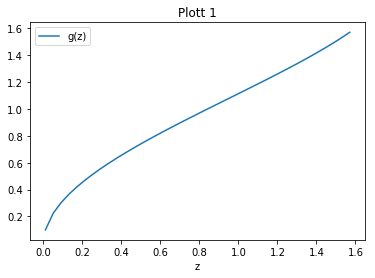

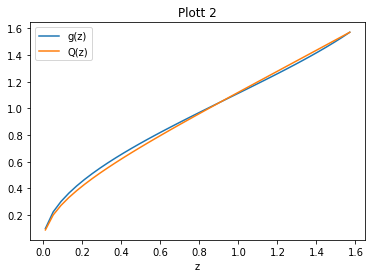

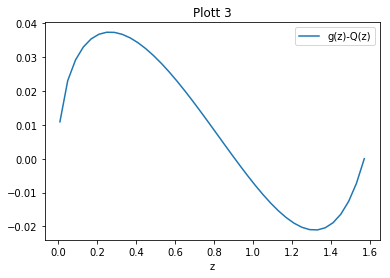

In [39]:
#b)
def invfunc(z,w0):
    '''Denne python-funksjonen beregner g(z) for en gitt verdi av z ved Newtoniterasjon.
    Input w0 er startverdien til Newtoniterasjonen (som du gjerne har hentet fra "invinterp")
    Funksjonen itererer til maskin-nøyaktighet som beskrevet under kapitlet Newtoniterasjon.
    Legg også inn en teller (iter) for antall iterasjoner og returner denne sammen med w=g(z)
    f.eks. "return w, iter"
    '''
    tol = np.finfo(float).eps
    est = 10*tol
    w_old = w0
    iter = 0
    while est > 2*tol and iter<100:
        w_new = w_old - (w_old*np.sin(w_old)-z)/(np.sin(w_old)+w_old*np.cos(w_old))
        est = abs(w_new-w_old)/abs(w_new)
        w_old = w_new
        iter += 1
    return w_new, iter
    
g0 = np.pi/3
g1 = np.pi/2
z = 1
w0 = invinterp(z, g0, g1)
w, iter = invfunc(z,w0)
print("Får at g(1)=", round(w,5), "med", iter, "antall iterasjoner.")



#c)
z_axis = np.linspace(0.01,np.pi/2,40)
g = np.zeros(len(z_axis))
for i in range(len(z_axis)):
    g[i],iter = invfunc(z_axis[i],w0)
Q = invinterp(z_axis,g0,g1)
e = g - Q

plt.plot(z_axis,g,label='g(z)')
plt.title('Plott 1')
plt.xlabel('z')
plt.legend()
plt.show()

plt.plot(z_axis,g,label='g(z)')
plt.plot(z_axis,Q,label='Q(z)')
plt.title('Plott 2')
plt.xlabel('z')
plt.legend()
plt.show()

plt.plot(z_axis,e,label='g(z)-Q(z)')
plt.title('Plott 3')
plt.xlabel('z')
plt.legend()
plt.show()

**HENTING AV AVRUNDINGSENHET**

In [1]:
import numpy as np

# Følgende kodeline leser avrundingsenheten inn i variablen tol
tol = np.finfo(float).eps
print(tol)

2.220446049250313e-16
